# Assignment 15 - Random_Forest_Company_Data

# 1) Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
fraud_check=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Machine Learning\\Random Forests\\Fraud_check.csv")

In [3]:
# Target variable - Taxable Income
fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud_check.shape

(600, 6)

# 2) EDA

In [5]:
fraud_check.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
fraud_check.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [7]:
round(fraud_check.describe())

,Taxable.Income,City.Population,Work.Experience
count,600.0,600.0,600.0
mean,55208.0,108747.0,16.0
std,26205.0,49850.0,9.0
min,10003.0,25779.0,0.0
25%,32872.0,66967.0,8.0
50%,55074.0,106494.0,15.0
75%,78612.0,150114.0,24.0
max,99619.0,199778.0,30.0


# Convert Income into 2 category as "risky" or "good" with some condition

In [8]:
# for i in range(len(fraud_check['Taxable.Income'])):
#        if fraud_check['Taxable.Income'][i]<=30000 :
#            fraud_check['Output'][i]="Risky"
#        else :
#            fraud_check['Output'][i]="Good"
            
DF=pd.Series(fraud_check['Taxable.Income'])
su=[]
for i in DF:
    if i<=30000:
        su.append("risky")
    else:
        su.append('good')
         

In [9]:
DF2=pd.DataFrame(su)
fraud_check=pd.concat([DF2,fraud_check],axis=1)
fraud_check=fraud_check.rename({0:'Output'},axis=1)
fraud_check.head()

,Output,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,good,NO,Single,68833,50047,10,YES
1,good,YES,Divorced,33700,134075,18,YES
2,good,NO,Married,36925,160205,30,YES
3,good,YES,Single,50190,193264,15,YES
4,good,NO,Married,81002,27533,28,NO


In [10]:
fraud_check['Taxable.Income'].value_counts()

59689    2
68833    1
60822    1
93090    1
79373    1
        ..
61906    1
31088    1
70365    1
56536    1
96519    1
Name: Taxable.Income, Length: 599, dtype: int64

In [11]:
fraud_check.columns

Index(['Output', 'Undergrad', 'Marital.Status', 'Taxable.Income',
       'City.Population', 'Work.Experience', 'Urban'],
      dtype='object')

# Change the Features name 

In [12]:
fraud_check.rename(columns= {'Taxable.Income':'Income','Marital.Status':'Status','Work.Experience':'Experience', 'City.Population':'Population'},inplace=True)

In [13]:
fraud_check['Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Status, dtype: int64

In [14]:
fraud_check.dtypes=='object'

Output         True
Undergrad      True
Status         True
Income        False
Population    False
Experience    False
Urban          True
dtype: bool

# Converting all categorial values into numerical values using label_encoder()

In [15]:

labelencoder = preprocessing.LabelEncoder()
for column_name in fraud_check.columns:
    if fraud_check[column_name].dtypes==object:
        fraud_check[column_name]=labelencoder.fit_transform(fraud_check[column_name])
    else :
        pass
      

In [16]:
fraud_check

,Output,Undergrad,Status,Income,Population,Experience,Urban
0,0,0,2,68833,50047,10,1
1,0,1,0,33700,134075,18,1
2,0,0,1,36925,160205,30,1
3,0,1,2,50190,193264,15,1
4,0,0,1,81002,27533,28,0
...,...,...,...,...,...,...,...
595,0,1,0,76340,39492,7,1
596,0,1,0,69967,55369,2,1
597,0,0,0,47334,154058,0,1
598,0,1,1,98592,180083,17,0


In [17]:
fraud_check.head()

,Output,Undergrad,Status,Income,Population,Experience,Urban
0,0,0,2,68833,50047,10,1
1,0,1,0,33700,134075,18,1
2,0,0,1,36925,160205,30,1
3,0,1,2,50190,193264,15,1
4,0,0,1,81002,27533,28,0


In [18]:
fraud_check.shape

(600, 7)

In [19]:
fraud_check.dtypes=='object'

Output        False
Undergrad     False
Status        False
Income        False
Population    False
Experience    False
Urban         False
dtype: bool

In [20]:
b=fraud_check.drop(['Population','Income'],axis=1)
b

,Output,Undergrad,Status,Experience,Urban
0,0,0,2,10,1
1,0,1,0,18,1
2,0,0,1,30,1
3,0,1,2,15,1
4,0,0,1,28,0
...,...,...,...,...,...
595,0,1,0,7,1
596,0,1,0,2,1
597,0,0,0,0,1
598,0,1,1,17,0


# Applying Standard Scaler

In [21]:
from sklearn.preprocessing import StandardScaler
a=fraud_check[['Population','Income']]
b=fraud_check.drop(['Population','Income'],axis=1)
std_scaler=StandardScaler()
std_scaler=std_scaler.fit_transform(a)
std_scaler=pd.DataFrame(data=std_scaler,columns=a.columns)

fraud_check=pd.concat([std_scaler,b],axis=1)
fraud_check

,Population,Income,Output,Undergrad,Status,Experience,Urban
0,-1.178521,0.520362,0,0,2,10,1
1,0.508500,-0.821464,0,1,0,18,1
2,1.033109,-0.698292,0,0,1,30,1
3,1.696831,-0.191666,0,1,2,15,1
4,-1.630532,0.985129,0,0,1,28,0
...,...,...,...,...,...,...,...
595,-1.390432,0.807075,0,1,0,7,1
596,-1.071672,0.563672,0,1,0,2,1
597,0.909696,-0.300744,0,0,0,0,1
598,1.432197,1.656940,0,1,1,17,0


# 3) Model Building 

In [22]:
x=fraud_check.iloc[:,[0,1,3,4,5]]
y=fraud_check[['Output']]

In [23]:
x

,Population,Income,Undergrad,Status,Experience
0,-1.178521,0.520362,0,2,10
1,0.508500,-0.821464,1,0,18
2,1.033109,-0.698292,0,1,30
3,1.696831,-0.191666,1,2,15
4,-1.630532,0.985129,0,1,28
...,...,...,...,...,...
595,-1.390432,0.807075,1,0,7
596,-1.071672,0.563672,1,0,2
597,0.909696,-0.300744,0,0,0
598,1.432197,1.656940,1,1,17


In [24]:
y

,Output
0,0
1,0
2,0
3,0
4,0
...,...
595,0
596,0
597,0
598,0


# Random Forest Classifier

In [25]:
num_trees = 100
max_features = 4
kfold = KFold(n_splits=10,random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

0.9983333333333334


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


# Split Data into training and test Data

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)


In [27]:
x_train.shape,y_train.shape

((480, 5), (480, 1))

In [28]:
x_test.shape,y_test.shape

((120, 5), (120, 1))

# Preparing the model

In [29]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

C:\Users\Dell\AppData\Local\Temp/ipykernel_18172/3603437581.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestClassifier()

In [30]:
y_predict=model.predict(x_test)
y_predict

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

C:\Users\Dell\AppData\Local\Temp/ipykernel_18172/1122007752.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
C:\Users\Dell\AppData\Local\Temp/ipykernel_18172/1122007752.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
C:\Users\Dell\AppData\Local\Temp/ipykernel_18172/1122007752.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
C:\Users\Dell\AppData\Local\Temp/ipykernel_18172/1122007752.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_tra

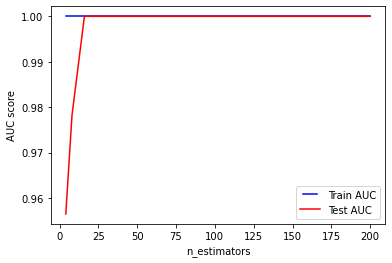

In [32]:
n_estimators = [4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
    
   model = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

# 2) Random_Forest = Fraud_check

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [42]:
fraud = pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Machine Learning\\Random Forests\\Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


#    EDA 

In [43]:
fraud.T

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
Undergrad,NO,YES,NO,YES,NO,NO,NO,YES,NO,YES,...,NO,YES,YES,NO,NO,YES,YES,NO,YES,NO
Marital.Status,Single,Divorced,Married,Single,Married,Divorced,Divorced,Single,Single,Divorced,...,Married,Single,Single,Divorced,Married,Divorced,Divorced,Divorced,Married,Divorced
Taxable.Income,68833,33700,36925,50190,81002,33329,83357,62774,83519,98152,...,43018,27394,68152,84775,47364,76340,69967,47334,98592,96519
City.Population,50047,134075,160205,193264,27533,116382,80890,131253,102481,155482,...,85195,132859,75143,131963,97526,39492,55369,154058,180083,158137
Work.Experience,10,18,30,15,28,0,8,3,12,4,...,14,18,16,10,9,7,2,0,17,16
Urban,YES,YES,YES,YES,NO,NO,YES,YES,YES,YES,...,YES,YES,NO,YES,YES,YES,YES,YES,NO,NO


In [44]:
fraud.shape

(600, 6)

In [66]:
round(fraud.describe())

,Taxable.Income,City.Population,Work.Experience
count,600.0,600.0,600.0
mean,55208.0,108747.0,16.0
std,26205.0,49850.0,9.0
min,10003.0,25779.0,0.0
25%,32872.0,66967.0,8.0
50%,55074.0,106494.0,15.0
75%,78612.0,150114.0,24.0
max,99619.0,199778.0,30.0


In [46]:
fraud.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [47]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [48]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:>

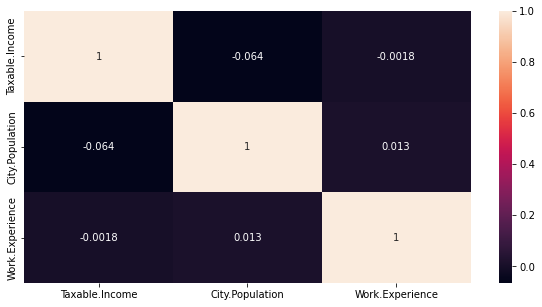

In [49]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(fraud.corr(),annot=True)

# Changing the categorical variables into dummies.

In [50]:
fraud1 = pd.get_dummies(fraud)

# Converting the Target variable i.e. Sales into Categorical


In [51]:
fraud1['Category'] = pd.cut(fraud1['Taxable.Income'], 
                        bins=[0,30000, np.inf], 
                        labels=['Risky','Good'],
                        include_lowest=True)
fraud1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Category
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,Good
596,69967,55369,2,0,1,1,0,0,0,1,Good
597,47334,154058,0,1,0,1,0,0,0,1,Good
598,98592,180083,17,0,1,0,1,0,1,0,Good


In [52]:
array = fraud1.values
X = array[:,1:10]
Y = array[:,10]

# Random Forest Classifier

In [53]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle = True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(round(results.mean()*100,2))

73.83


# Ensemble techniques


# Bagging

In [61]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier

seed = 7

cart = DecisionTreeClassifier()
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results1 = cross_val_score(model1, X, Y, cv=kfold)
print(round(results.mean()*100,2))

73.83


# Boosting


# AdaBoost Classification

In [62]:
model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results2 = cross_val_score(model2, X, Y, cv=kfold)
print(round(results.mean()*100,2))

73.83


# Stacking


# Stacking Ensemble for Classification

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Iteration 1

In [64]:
estimators = []
seed = 7 
model3 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model3))
model4 = DecisionTreeClassifier()
estimators.append(('cart', model4))
model5 = SVC()
estimators.append(('svm', model5))
model6 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model6))
model7 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model7))

# create the ensemble modelIter
ensemble = VotingClassifier(estimators)
results3 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results3.mean()*100)

78.66666666666666


# Iteration  2

In [65]:
estimators = []
seed = 7 
model8 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model8))
model9 = DecisionTreeClassifier()
estimators.append(('cart', model9))
model10 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model10))
model11 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model11))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results4 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results4.mean()*100)

78.83333333333333


# END 